In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [36]:
df = pd.read_csv('column_3C_weka.csv')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='class', ylabel='count'>

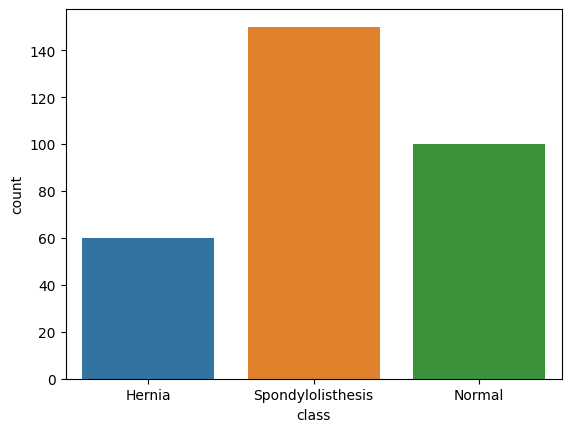

In [9]:
df['class'].value_counts()
sns.countplot(data=df, x='class', hue='class')

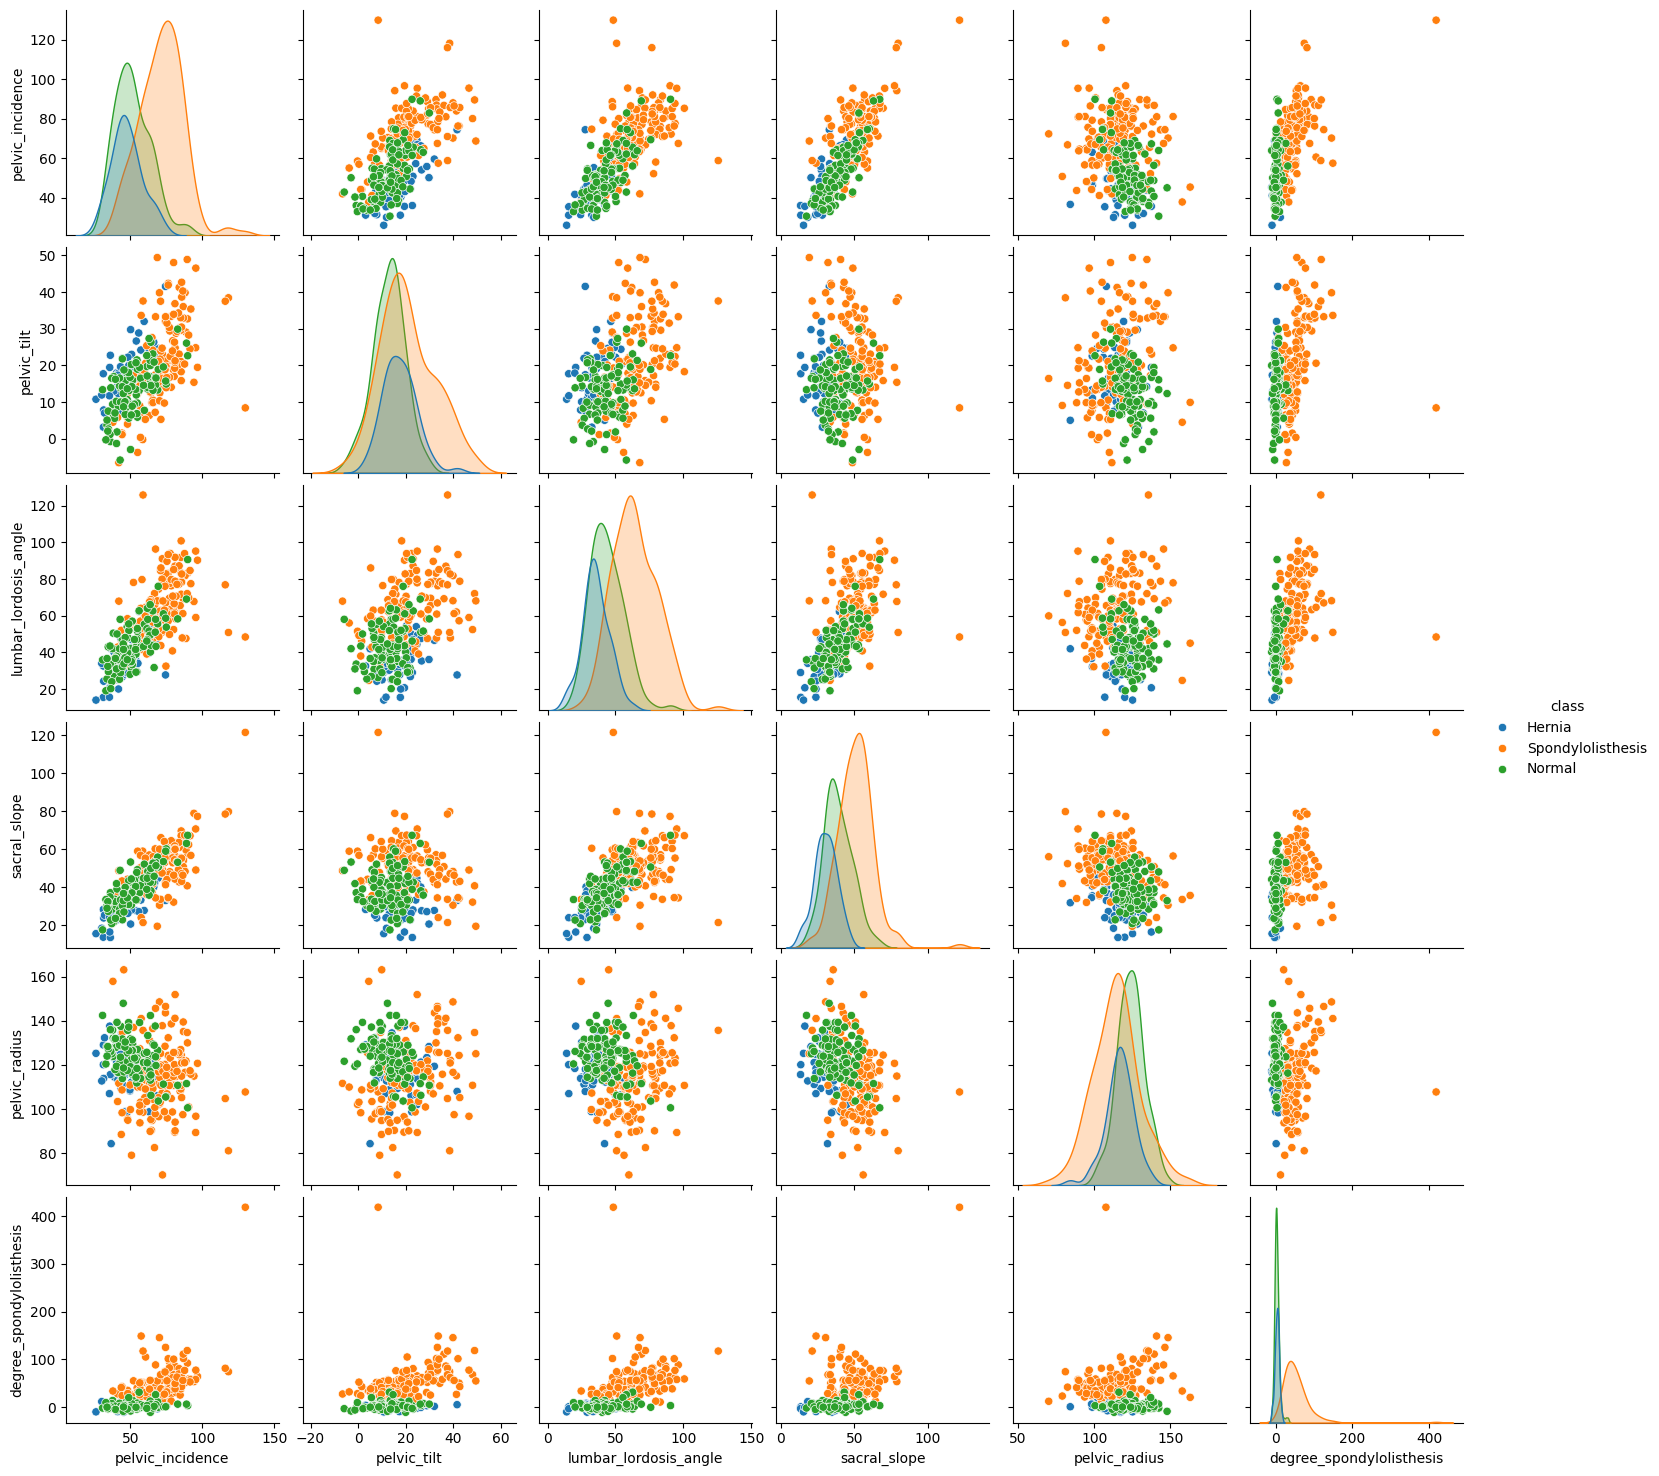

In [10]:
sns.pairplot(data=df, hue='class')

In [11]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [37]:
X = df.drop(columns=['class'])
y = df['class']

In [38]:
# Normalização
# X_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(X)

# Padronização
X_scaled = StandardScaler().fit_transform(X)

X = X_scaled

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=7)

In [40]:
classifier = KNeighborsClassifier(n_neighbors=3, p=2)
knn = classifier.fit(Xtrain, ytrain)
knn

KNeighborsClassifier(n_neighbors=3)

In [41]:
ypred = classifier.predict(Xtest)

In [42]:
actual_vs_predict = pd.DataFrame({'Actual':ytest, 'Predict':ypred})
actual_vs_predict.head(10)

,Actual,Predict
279,Normal,Normal
102,Spondylolisthesis,Spondylolisthesis
171,Spondylolisthesis,Spondylolisthesis
170,Spondylolisthesis,Spondylolisthesis
307,Normal,Hernia
264,Normal,Normal
132,Spondylolisthesis,Spondylolisthesis
159,Spondylolisthesis,Spondylolisthesis
37,Hernia,Normal
81,Spondylolisthesis,Spondylolisthesis


In [43]:
print('Accuracy: %.2f%%' % (accuracy_score(ytest, ypred) * 100), '\n')

print('Classification Report:\n', classification_report(ytest, ypred), '\n')

print('Confusion Matrix: \n', confusion_matrix(ytest, ypred))

Accuracy: 82.26% 

Classification Report:
                    precision    recall  f1-score   support

           Hernia       0.45      0.71      0.56         7
           Normal       0.83      0.71      0.77        21
Spondylolisthesis       0.94      0.91      0.93        34

         accuracy                           0.82        62
        macro avg       0.74      0.78      0.75        62
     weighted avg       0.85      0.82      0.83        62
 

Confusion Matrix: 
 [[ 5  2  0]
 [ 4 15  2]
 [ 2  1 31]]
